# Billboard Dataset Cleaning & Reshaping
This notebook loads, cleans, reshapes, and analyzes the Billboard dataset.

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('billboard.csv', encoding='unicode_escape')
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observing the dataset
The dataset is in wide format, with each week stored as a separate column. Many week columns contain empty strings or inconsistent values.

In [12]:
df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

- The dataset is in wide format, meaning each week is stored as a separate column (x1st.week, x2nd.week, …).
- This is structurally wrong for analysis because:
- Weeks should be rows, not columns.
- Many week columns contain empty strings, " ", or "NA" instead of proper missing values.
- Week column names contain extra text ("x1st.week" instead of "1").
- Rankings are stored as strings in some rows.

## Melt the dataset into long format

In [13]:
week_cols = [c for c in df.columns if 'week' in c]

df_melt = df.melt(
    id_vars=['year','artist.inverted','track','time','genre','date.entered','date.peaked'],
    value_vars=week_cols,
    var_name='Week',
    value_name='Rank'
)
df_melt.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


## Clean Week column

In [14]:
df_melt['Week'] = (
    df_melt['Week']
    .str.replace('x','', regex=False)
    .str.replace('.week','', regex=False)
    .str.replace('st','', regex=False)
    .str.replace('nd','', regex=False)
    .str.replace('rd','', regex=False)
    .str.replace('th','', regex=False)
)

df_melt['Week'] = pd.to_numeric(df_melt['Week'], errors='coerce')
df_melt.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


## Compute the date at which the song had the given rank

In [15]:
df_melt['date.entered'] = pd.to_datetime(df_melt['date.entered'])

df_melt['Rank_Date'] = df_melt['date.entered'] + pd.to_timedelta(df_melt['Week'] - 1, unit='W')
df_melt.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank,Rank_Date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-05


### What was wrong with the earlier calculation?
- If someone mistakenly used:
- date.entered. " + " Week
- that would be incorrect because:
- Adding an integer to a datetime does not add weeks.
- You must convert the integer into a Timedelta.
- The correct timedelta is (Week - 1) weeks, because week 1 corresponds to the entry date itself.

## Keep necessary columns

In [16]:
df_clean = df_melt[['artist.inverted','track','genre','Week','Rank','Rank_Date']]
df_clean.head()

,artist.inverted,track,genre,Week,Rank,Rank_Date
0,Destiny's Child,Independent Women Part I,Rock,1,78.0,2000-09-23
1,Santana,"Maria, Maria",Rock,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,Rock,1,71.0,1999-10-23
3,Madonna,Music,Rock,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,1,57.0,2000-08-05


## Rename columns

In [17]:
df_clean = df_clean.rename(columns={
    'artist.inverted': 'Artist',
    'track': 'Track',
    'genre': 'Genre',
    'Week': 'Week_Number',
    'Rank': 'Chart_Rank',
    'Rank_Date': 'Date_of_Rank'
})

df_clean.head()

,Artist,Track,Genre,Week_Number,Chart_Rank,Date_of_Rank
0,Destiny's Child,Independent Women Part I,Rock,1,78.0,2000-09-23
1,Santana,"Maria, Maria",Rock,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,Rock,1,71.0,1999-10-23
3,Madonna,Music,Rock,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,1,57.0,2000-08-05


## Clean NaN values

In [18]:
df_clean['Chart_Rank'] = pd.to_numeric(df_clean['Chart_Rank'], errors='coerce')
df_clean = df_clean.dropna(subset=['Chart_Rank'])
df_clean.head()

,Artist,Track,Genre,Week_Number,Chart_Rank,Date_of_Rank
0,Destiny's Child,Independent Women Part I,Rock,1,78.0,2000-09-23
1,Santana,"Maria, Maria",Rock,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,Rock,1,71.0,1999-10-23
3,Madonna,Music,Rock,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,1,57.0,2000-08-05


# Chart Trajectory Visualizations

## 1. Plot trajectory for a single song

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

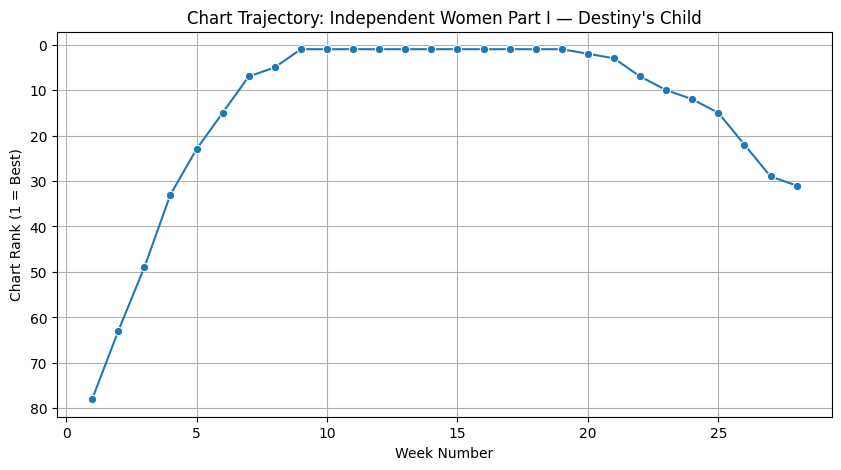

In [26]:
def plot_song_trajectory(Artist, Track):
    subset = df_clean[(df_clean["Artist"] == Artist) & (df_clean["Track"] == Track)]
    subset = subset.sort_values("Week_Number")

    plt.figure(figsize=(10,5))
    sns.lineplot(data=subset, x="Week_Number", y="Chart_Rank", marker="o")
    plt.gca().invert_yaxis()  # rank 1 at top
    plt.title(f"Chart Trajectory: {Track} — {Artist}")
    plt.xlabel("Week Number")
    plt.ylabel("Chart Rank (1 = Best)")
    plt.grid(True)
    plt.show()

# Example
plot_song_trajectory("Destiny's Child", "Independent Women Part I")

## 2. Compare multiple songs on one plot

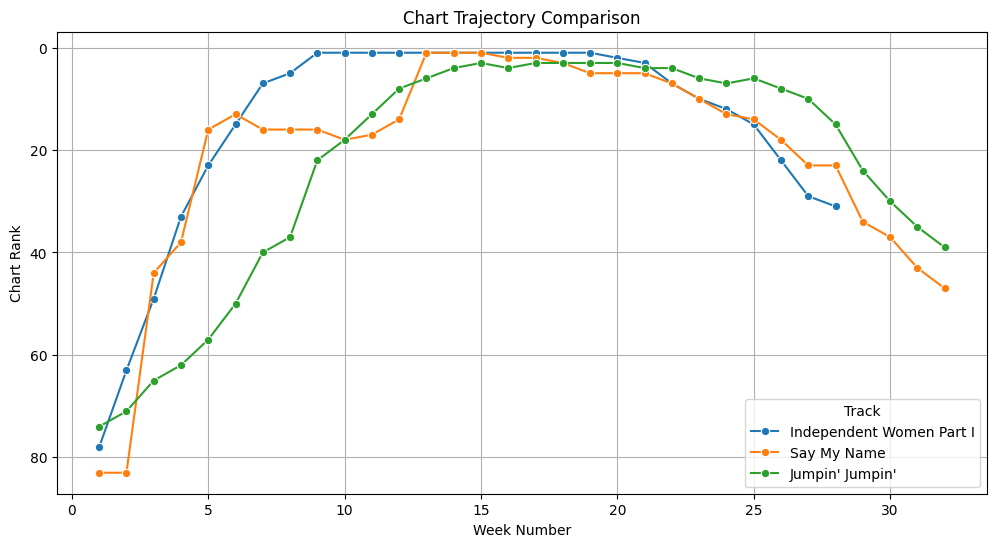

In [27]:
def compare_songs(song_list):
    subset = df_clean[df_clean["Track"].isin(song_list)]

    plt.figure(figsize=(12,6))
    sns.lineplot(data=subset, x="Week_Number", y="Chart_Rank", hue="Track", marker="o")
    plt.gca().invert_yaxis()
    plt.title("Chart Trajectory Comparison")
    plt.xlabel("Week Number")
    plt.ylabel("Chart Rank")
    plt.grid(True)
    plt.show()

# Example
compare_songs([
    "Independent Women Part I",
    "Say My Name",
    "Jumpin' Jumpin'"
])